In [ ]:
#계절별로 어느국가가 많이 방문하는지 알아보기위한 앱, 클러스터링
#18~(20년부터 22년 코로나기간 제외)~24년, 25,26년(예측데이터)까지의 데이터를 이용하여 클러스터링

In [ ]:
#데이터 로드
import pandas as pd
df_china=pd.read_csv('data/df_china_XGB.csv')
df_others=pd.read_csv('data/df_top14_prophet.csv')

In [4]:
df_china

,년,월,국적지역,입국자수
0,2018,1,중국,322446
1,2018,2,중국,367017
2,2018,3,중국,427618
3,2018,4,중국,385386
4,2018,5,중국,389044
...,...,...,...,...
67,2026,8,중국,470717
68,2026,9,중국,524321
69,2026,10,중국,445045
70,2026,11,중국,411989


In [5]:
df_others

,국적지역,년,월,입국자수
0,대만,2018,1,69550
1,대만,2018,2,79099
2,대만,2018,3,89247
3,대만,2018,4,99119
4,대만,2018,5,90267
...,...,...,...,...
1000,홍콩,2026,8,37816
1001,홍콩,2026,9,32457
1002,홍콩,2026,10,39486
1003,홍콩,2026,11,33339


In [8]:
#df_other, df_china를 합침
df=pd.concat([df_china,df_others]).reset_index(drop=True)

In [9]:
df

,년,월,국적지역,입국자수
0,2018,1,중국,322446
1,2018,2,중국,367017
2,2018,3,중국,427618
3,2018,4,중국,385386
4,2018,5,중국,389044
...,...,...,...,...
1072,2026,8,홍콩,37816
1073,2026,9,홍콩,32457
1074,2026,10,홍콩,39486
1075,2026,11,홍콩,33339


In [10]:
df.to_csv('data/df_total.csv',index=False)

In [14]:
# 데이터 전처리
#사계절 분석을 위해 계절 추가
#(봄(3~5월), 여름(6~8월), 가을(9~11월), 겨울(12~2월))
df['계절'] = df['월'].apply(lambda x: '봄' if x in [3, 4, 5] else
                                      '여름' if x in [6, 7, 8] else
                                      '가을' if x in [9, 10, 11] else '겨울')


In [15]:
df

,년,월,국적지역,입국자수,계절
0,2018,1,중국,322446,겨울
1,2018,2,중국,367017,겨울
2,2018,3,중국,427618,봄
3,2018,4,중국,385386,봄
4,2018,5,중국,389044,봄
...,...,...,...,...,...
1072,2026,8,홍콩,37816,여름
1073,2026,9,홍콩,32457,가을
1074,2026,10,홍콩,39486,가을
1075,2026,11,홍콩,33339,가을


In [16]:
seasonal_df = df.groupby(['국적지역', '계절'])['입국자수'].sum().unstack(fill_value=0)

In [17]:
seasonal_df

계절,가을,겨울,봄,여름
국적지역,,,,
대만,2025897,1698266,1778061,2178458
러시아,338831,271490,362563,340985
말레이시아,548420,479824,489436,305147
미국,2165257,1489123,2189898,2253583
베트남,888134,632660,876140,909816
싱가포르,591367,497847,549632,388233
영국,243081,160268,253290,227188
오스트레일리아,351526,302571,323890,288043
인도네시아,465525,399612,452002,423285


In [18]:
#컬럼순서 봄 여름 가을 겨울로 변경
seasonal_df = seasonal_df[['봄', '여름', '가을', '겨울']]

In [19]:
seasonal_df.to_csv('data/seasonal_df.csv', index=True)

In [21]:
#한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


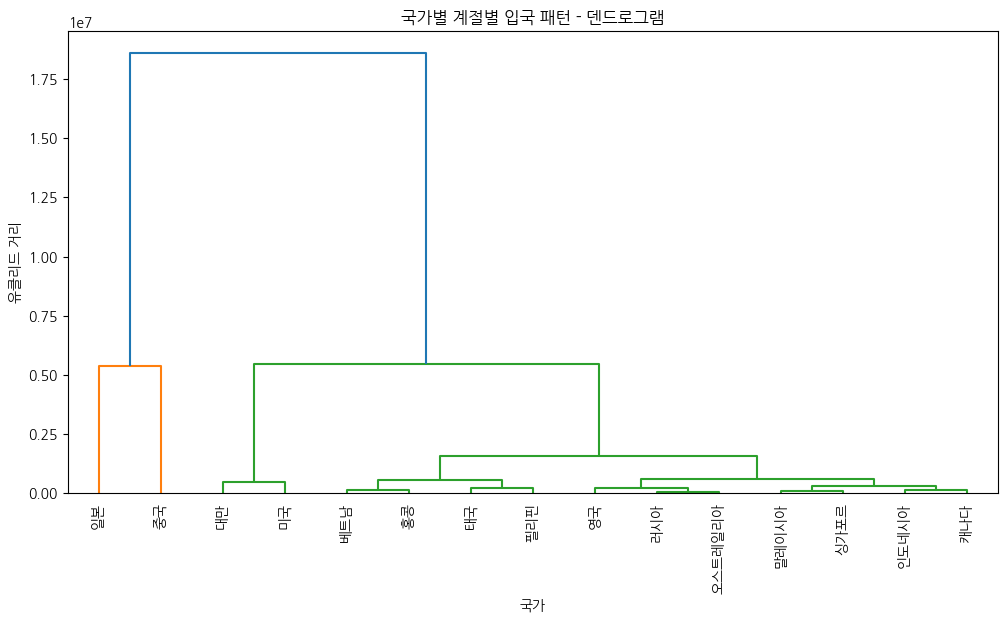

In [22]:
#덴드로그램 확인
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 클러스터링 수행
linkage_matrix = linkage(seasonal_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=seasonal_df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('국가별 계절별 입국 패턴 - 덴드로그램')
plt.xlabel('국가')
plt.ylabel('유클리드 거리')
plt.savefig('image/seasonal_dendrogram.png')
plt.show()

In [ ]:
# 4개 클러스터가 적절해보임

In [23]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(seasonal_df, method='ward')
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
seasonal_df['클러스터'] = clusters

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_36870/922336966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_df['클러스터'] = clusters


In [24]:
seasonal_df

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
대만,1778061,2178458,2025897,1698266,3
러시아,362563,340985,338831,271490,4
말레이시아,489436,305147,548420,479824,4
미국,2189898,2253583,2165257,1489123,3
베트남,876140,909816,888134,632660,4
싱가포르,549632,388233,591367,497847,4
영국,253290,227188,243081,160268,4
오스트레일리아,323890,288043,351526,302571,4
인도네시아,452002,423285,465525,399612,4


In [25]:
#seasonal_df 저장
seasonal_df.to_csv('data/seasonal_df.csv', index=True)

In [26]:
#1번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 1]


계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
일본,4272383,4854773,4795620,3469643,1


In [27]:
#2번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 2]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
중국,6765552,7737834,7794596,5756238,2


In [28]:
#3번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 3]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
대만,1778061,2178458,2025897,1698266,3
미국,2189898,2253583,2165257,1489123,3


In [29]:
#4번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 4]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
러시아,362563,340985,338831,271490,4
말레이시아,489436,305147,548420,479824,4
베트남,876140,909816,888134,632660,4
싱가포르,549632,388233,591367,497847,4
영국,253290,227188,243081,160268,4
오스트레일리아,323890,288043,351526,302571,4
인도네시아,452002,423285,465525,399612,4
캐나다,454552,367498,435910,283201,4
태국,793403,445685,614998,535665,4


In [30]:
seasonal_df[seasonal_df['클러스터'] == 4].index

Index(['러시아', '말레이시아', '베트남', '싱가포르', '영국', '오스트레일리아', '인도네시아', '캐나다', '태국',
       '필리핀', '홍콩'],
      dtype='object', name='국적지역')

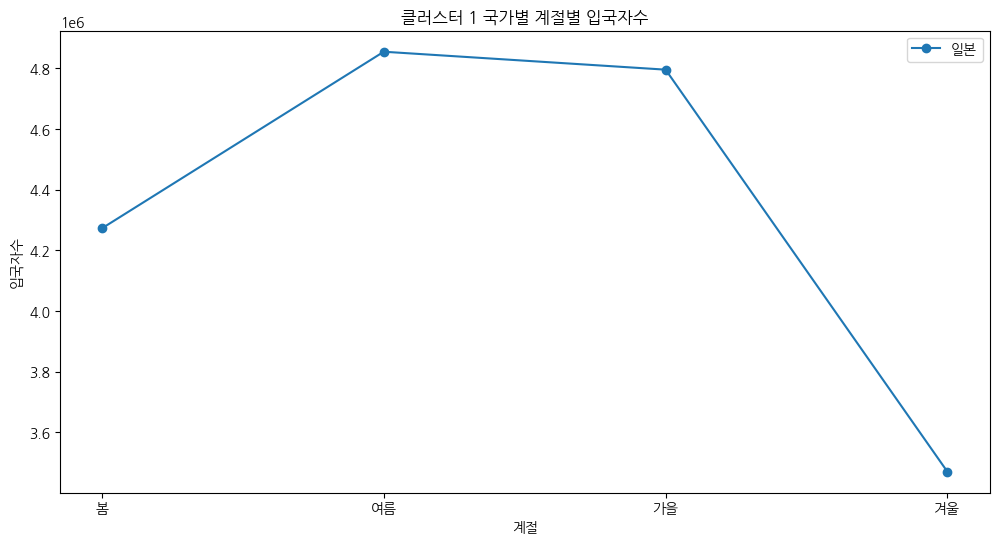

In [ ]:
#클러스터별 분석
#클러스터 1
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 1].T.drop('클러스터'), marker='o')
plt.title('클러스터 1 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 1].index)
plt.savefig('image/seasonal_cluster1.png')
plt.show()

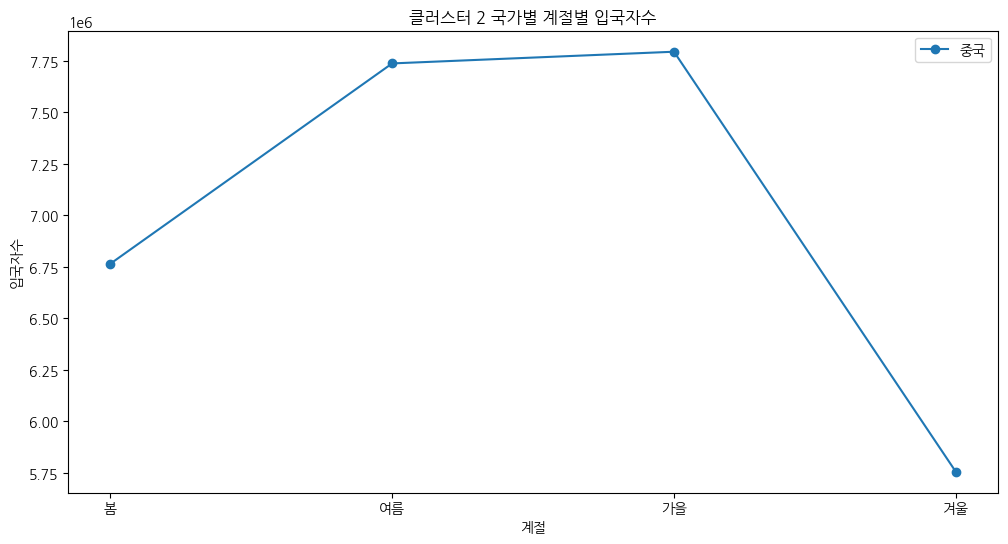

In [33]:
#클러스터 2
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 2].T.drop('클러스터'), marker='o')
plt.title('클러스터 2 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 2].index)
plt.savefig('image/seasonal_cluster2.png')
plt.show()

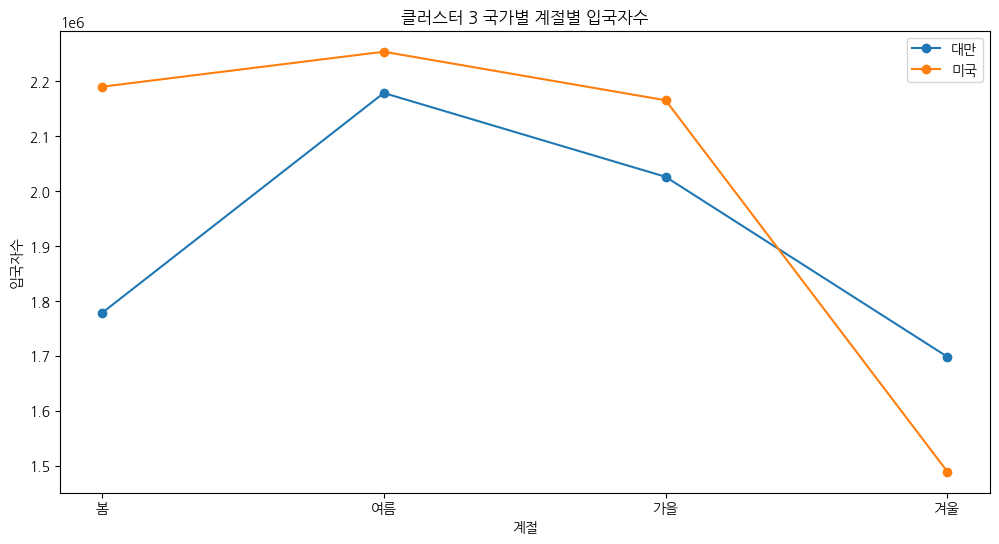

In [34]:
#클러스터 3
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 3].T.drop('클러스터'), marker='o')
plt.title('클러스터 3 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 3].index)
plt.savefig('image/seasonal_cluster3.png')
plt.show()

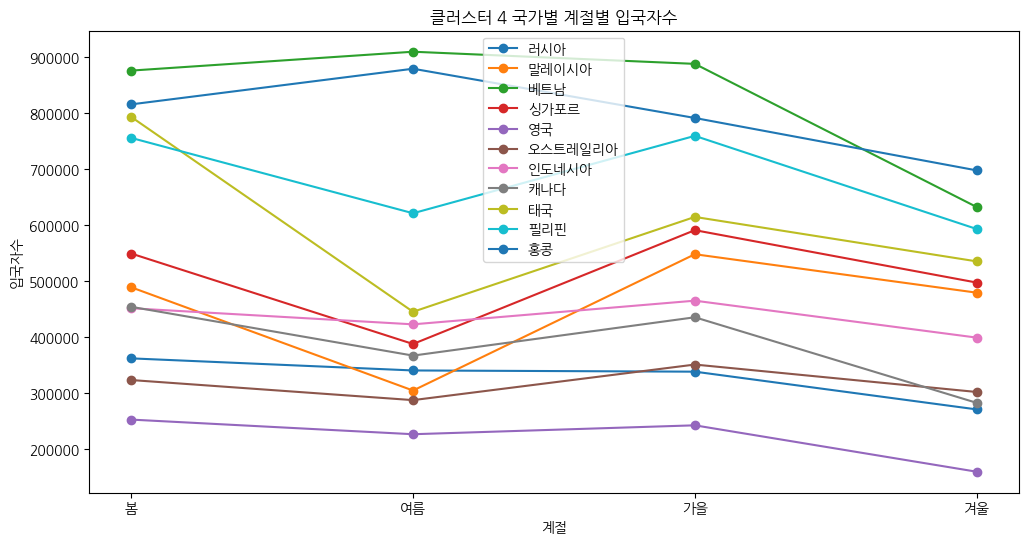

In [35]:
#클러스터 4
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 4].T.drop('클러스터'), marker='o')
plt.title('클러스터 4 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 4].index)
plt.savefig('image/seasonal_cluster4.png')
plt.show()

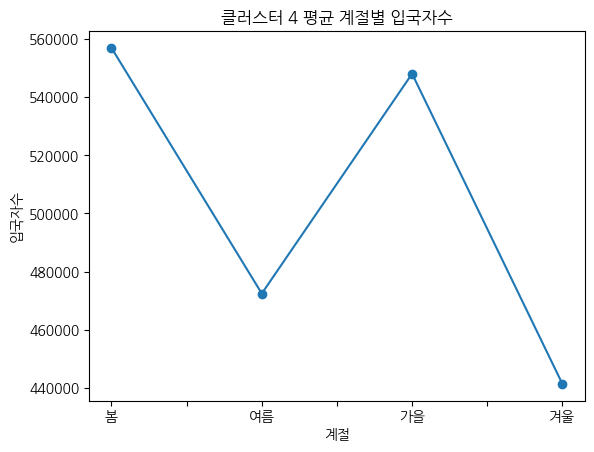

In [36]:
#클러스터4는 국가가 너무 많아 그래프가 보기 힘들어서 평균값으로 확인
seasonal_df[seasonal_df['클러스터'] == 4].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 4 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.savefig('image/seasonal_cluster4_mean.png')
plt.show()

### 🔹 **클러스터 1 (고입국 국가군)**

- **일본 🇯🇵**
- 꾸준한 관광 수요가 있고, 연중 비교적 안정적인 방문 패턴

### 🔹 **클러스터 2 (초고입국 국가군)**

- **중국 🇨🇳**
- **여름과 가을에 입국자 수가 가장 많으며, 전체적으로 가장 높은 트래픽을 보이는 국가**

### 🔹 **클러스터 3 (중간 입국 국가군)**

- **대만 🇹🇼, 미국 🇺🇸**
- 여름철과 가을철 입국이 활발하며, 연중 일정한 방문자 수 유지

### 🔹 **클러스터 4 (저입국 국가군 / 성장 가능성 국가)**

- **러시아 🇷🇺, 말레이시아 🇲🇾, 베트남 🇻🇳, 싱가포르 🇸🇬, 영국 🇬🇧, 오스트레일리아 🇦🇺, 인도네시아 🇮🇩, 캐나다 🇨🇦, 태국 🇹🇭, 필리핀 🇵🇭**
- 계절별 입국 패턴이 다양하며, 일부 국가는 특정 시즌(예: 겨울, 여름)에 입국이 증가하는 경향